## 1. Introduction

---

Graded Challenge 4

Name : Ogi Hadicahyo

Batch  : HCK - 012 (Phase 1)

---

**Background**

I am a Data Scientist who decided to predict the Uber & Lyft price by creating a Machine Learning model based on Uber and Lyft Dataset Boston, MA

**Problem Statement**

Creating a predictive machine learning model using Linear Regression model to predict Uber & Lyft price with the provided dataset.

**Dataset**
The data is obtained from Kaggle with <a href="https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma">this link</a>. This dataset is about Uber and Lyft Dataset Boston, MA. The dataset has over 693.071 records with 57 columns of sample dataset for Uber & Lyft price pings.


## 2. Import Libraries

Import the library or module to be used into the notebook

In [3]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from scipy import stats
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer

#library for Model
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

#library untuk model saving
import pickle
import json

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [4]:
# Load the .csv file
data = pd.read_csv('Uber and Lyft Dataset.csv')

In [5]:
# Show the first 5 data
print('The first 5 rows data')
display(data.head(5))

# Show the last 5 data
print('The last 5 rows data')
display(data.tail(5))

The first 5 rows data


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


The last 5 rows data


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Uber and Lyft datasets loaded successfully. The next step is to examine the info dataset to get an overview and understand the entire dataset

In [6]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
# Check the number of columns of integer type
integer_columns = len(data.select_dtypes(include='int64').columns)

# Check the number of columns of float type
float_columns = len(data.select_dtypes(include='float64').columns)

# Check the number of columns of object type
object_columns = len(data.select_dtypes(include='object').columns)

# Displays the number of columns of integer, float, and object types
print(f"Number of columns of integer type: {integer_columns}")
print(f"Number of columns of type float: {float_columns}")
print(f"Number of columns of type object: {object_columns}")

Number of columns of integer type: 17
Number of columns of type float: 29
Number of columns of type object: 11


- The dataset has 693071 rows with 57 columns
- Consists of 29 float columns, 17 integer columns and 11 object columns
- There is an indication that the dataset has missing values. The missing value is in the 'price' column and maybe theres also in another column. Therefore, we need to handle it.

In [8]:
# Remove Missing Value
data = data.dropna()
data.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## 4. Exploratory Data Analysis (EDA)

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data Exploration process

In [9]:
# copy dataframe for visualization
data_visualization = data.copy()

Done!! Let's Continue to the visualization process.

---
### 4.1 Price Distribution

In [10]:
# Find 'price' distribution
price_skew = pd.DataFrame(data_visualization)
price_skew['price'].skew()

1.0457470560899258

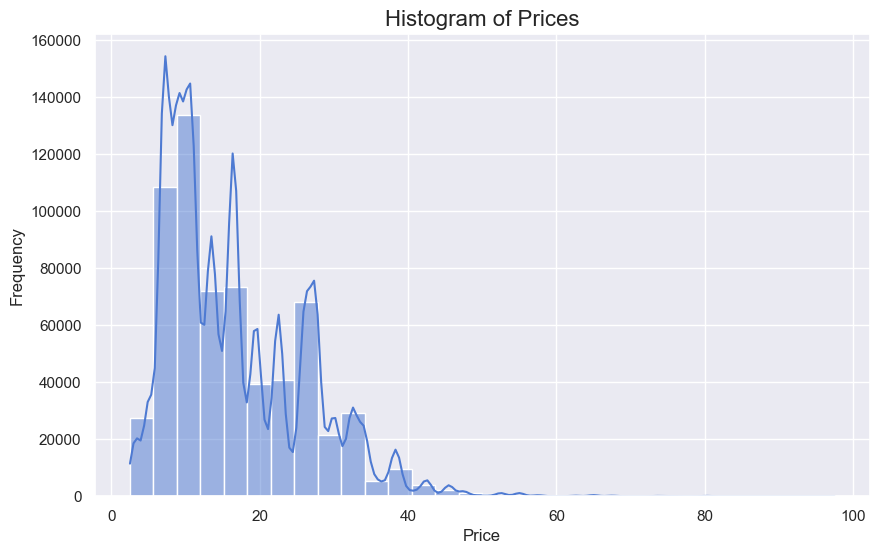

In [11]:
# Set the Seaborn theme to dark
sns.set_theme(style="darkgrid")

# Create a histogram with the "viridis" color palette and dark background
plt.figure(figsize=(10, 6))
sns.histplot(data_visualization['price'], kde=True, bins=30, color='#4E7AD2', palette='mako')

# Add axis titles and labels
plt.title('Histogram of Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Displays the plot
plt.show()

From the skewness value which shows a skew towards the left and the spread of data on the histogram, it can be concluded that the 'price' dataset tends to be centered around the lower values, while most of the values tend to be towards the left side of the distribution.

---
### 4.2 Price analysis between Uber and Lyft and service types

To see the visualization of Price analysis between Uber and Lyft and service types, first we will make calculations to get the value

In [12]:
# Look for the average price of each cab_type and name
df_pcar = data_visualization.groupby(['name','cab_type'])['price'].mean().reset_index().sort_values(by='price')
df_pcar

,name,cab_type,price
7,Shared,Lyft,6.029893
8,UberPool,Uber,8.752500
5,Lyft,Lyft,9.610885
11,WAV,Uber,9.765019
9,UberX,Uber,9.765074
6,Lyft XL,Lyft,15.309363
10,UberXL,Uber,15.678144
2,Lux,Lyft,17.771240
0,Black,Uber,20.523786
3,Lux Black,Lyft,23.062468


Next, we're gonna make the visualization

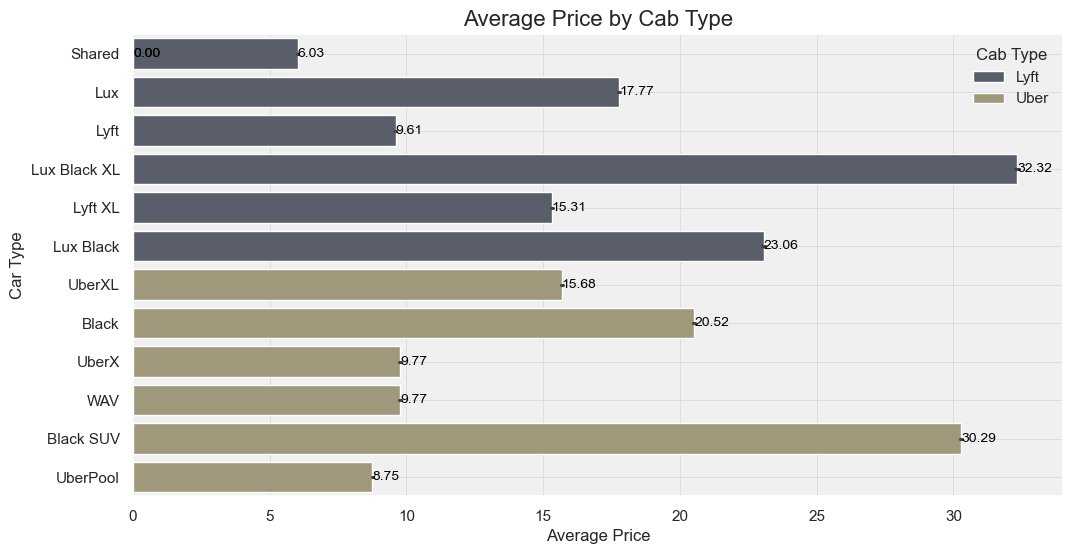

In [13]:
# Set the Seaborn theme to dark
sns.set_theme(style="darkgrid")

# Create a bar plot with a larger size
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='price', y='name', hue='cab_type', data=data_visualization, palette='cividis')

# Add value annotations to each bar
for p in ax.patches:
     ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=10, color='black')

# Add axis titles and labels
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Car Type', fontsize=12)
plt.title('Average Price by Cab Type', fontsize=16)

# Displays the legend
plt.legend(title='Cab Type')

# Sets the background color of the plot
ax.set_facecolor('#f0f0f0')

# Removes the box around the legend
ax.get_legend().set_frame_on(False)

# Set the grid color
ax.grid(color='#d4d4d4', linestyle='-', linewidth=0.5)

# Displays the plot
plt.show()

From the data and visualization above, there is information regarding the type of taxi service (cab_type), the name of the service provider (name), and the average price for each combination of service type and service provider. Here are brief conclusions from the data:

- There are several types of taxi services, such as Shared, UberPool, Lyft, WAV, UberX, Lyft XL, UberXL, Lux, Black, Lux Black, Black SUV, and Lux Black XL.

- Average prices vary between service types and service providers. The highest price was found on the Lux Black XL (Lyft) at 32.32, followed by the Black SUV (Uber) at 30.29. The lowest price was found on the Shared (Lyft) service at 6.03.

- Certain services tend to have higher prices, such as services that include the word "Lux" and "Black SUV" services.

- Lyft and Uber service providers offer different types of services at different prices.

---
### 4.3 Uber & lyft price trends in a month

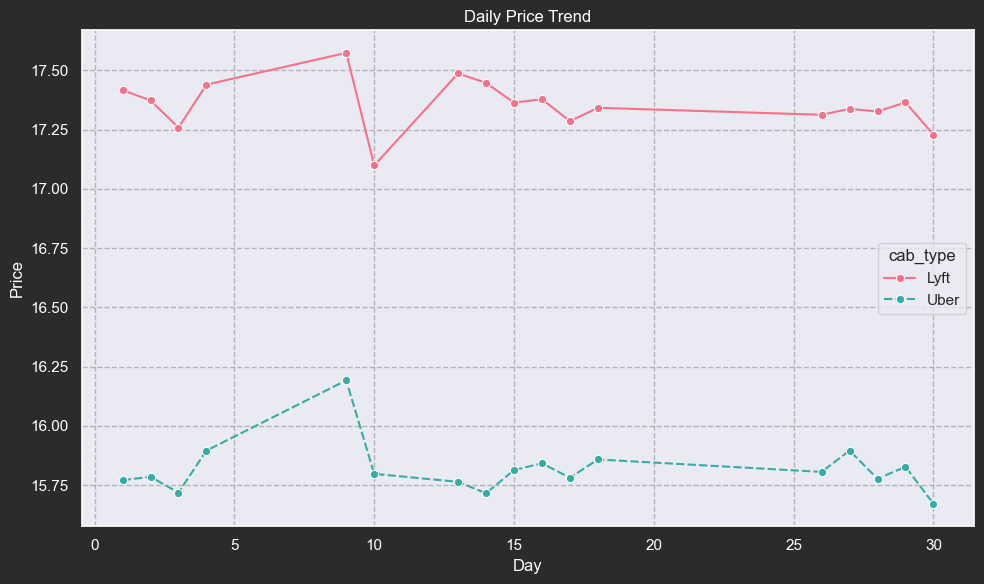

In [14]:
# Grouping prices based on day and cab type
grouped = data_visualization.groupby(['day','cab_type'])['price'].mean().unstack()

# Set a custom color palette with a gradient
colors = sns.color_palette("husl", n_colors=len(data_visualization['cab_type'].unique()))

# Set style to dark
sns.set(style="dark")

# Plotting with lineplot
plt.figure(figsize=(10, 6), facecolor='#2B2B2B')
ax = sns.lineplot(data=grouped, marker='o', palette=colors)

# Labeling and title
plt.xlabel('Day', color='white')
plt.ylabel('Price', color='white')
plt.title('Daily Price Trend', color='white')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5, color='gray')

# Change the color of the values on the y-axis to white
for tick in ax.get_yticklabels():
     tick.set_color('white')

# Change the color of the values on the x-axis to white
for tick in ax.get_xticklabels():
     tick.set_color('white')

# Show the plot
plt.tight_layout()
plt.show()

Based on the visualization, There is a general trend where service prices tend to increase at the beginning of the month and then decrease towards the end of the month. However, Lyft is an exception by charging higher prices for its services.

---
### 4.4 Number of Daily Trips by Cab Type

In [15]:
# Mengelompokkan berdasarkan 'day' dan menghitung jumlah penumpang
passenger_count_by_day = data_visualization.groupby('day')['id'].count().reset_index()

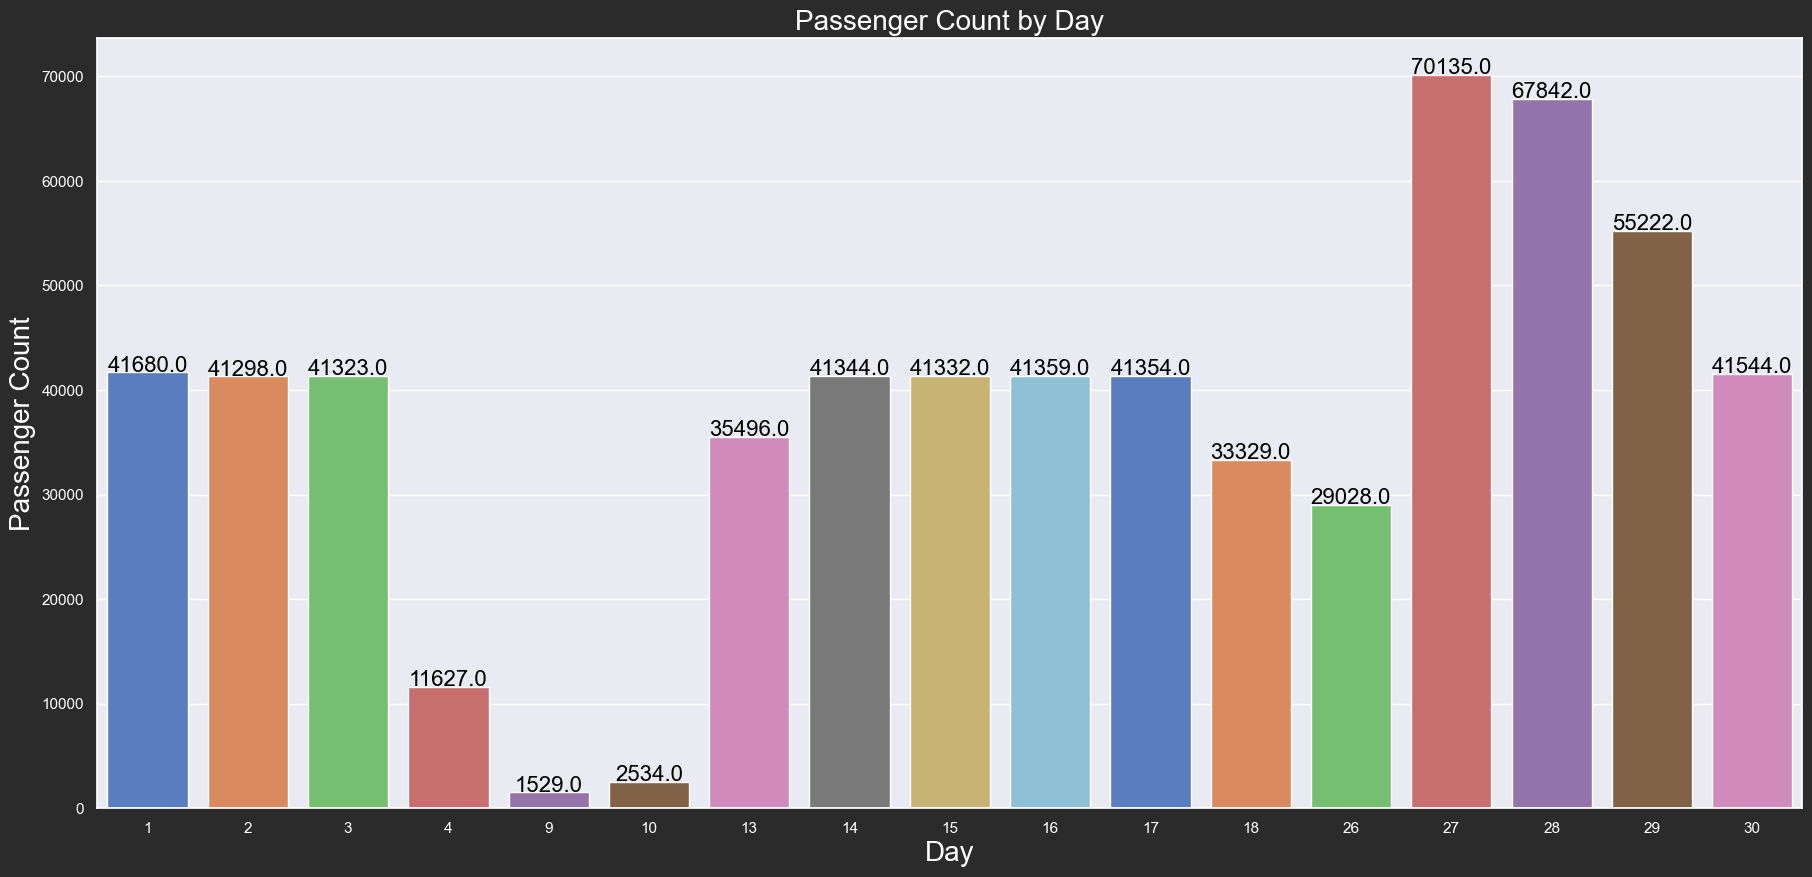

In [16]:
# Mengatur tema Seaborn menjadi gelap
sns.set_theme(style="darkgrid")

# Membuat plot bar dengan palet warna yang menarik
plt.figure(figsize=(22, 10), facecolor='#2B2B2B')
ax = sns.barplot(x='day', y='id', data=passenger_count_by_day, palette="muted")

# Menambahkan label pada batang-batang plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Passenger Count by Day', fontsize=20, color='white')
plt.xlabel('Day', fontsize=20, color='white')
plt.ylabel('Passenger Count', fontsize=20, color='white')

# Ubah warna nilai-nilai pada sumbu y menjadi putih
for tick in ax.get_yticklabels():
    tick.set_color('white')

# Ubah warna nilai-nilai pada sumbu x menjadi putih
for tick in ax.get_xticklabels():
    tick.set_color('white')

# Menampilkan plot
plt.show()

Based on the barchart visualization above, we can conclude that:

- There is variation in the number of trips from day to day.
- In general, the number of trips at the beginning of the month is similar to the number of trips in the middle of the month.
- There are days with very few trips, or even no travel data, such as on the 5th and 11th, this could be caused by incomplete data, or because no trips occurred on those dates.
- The 27th and 28th recorded the highest number of trips, but there was a decline again after those dates.

**In conclusion, this pattern shows fluctuations in travel on each day throughout the month.**

---
### 4.5 Favourite Destination

In [17]:
# Group by 'destination' and calculate the average 'price'
destination_passenger = data_visualization.groupby('destination')['id'].count().sort_values(ascending=False)
destination_passenger

destination
Financial District         54192
Back Bay                   53190
Theatre District           53189
Boston University          53171
Haymarket Square           53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: id, dtype: int64

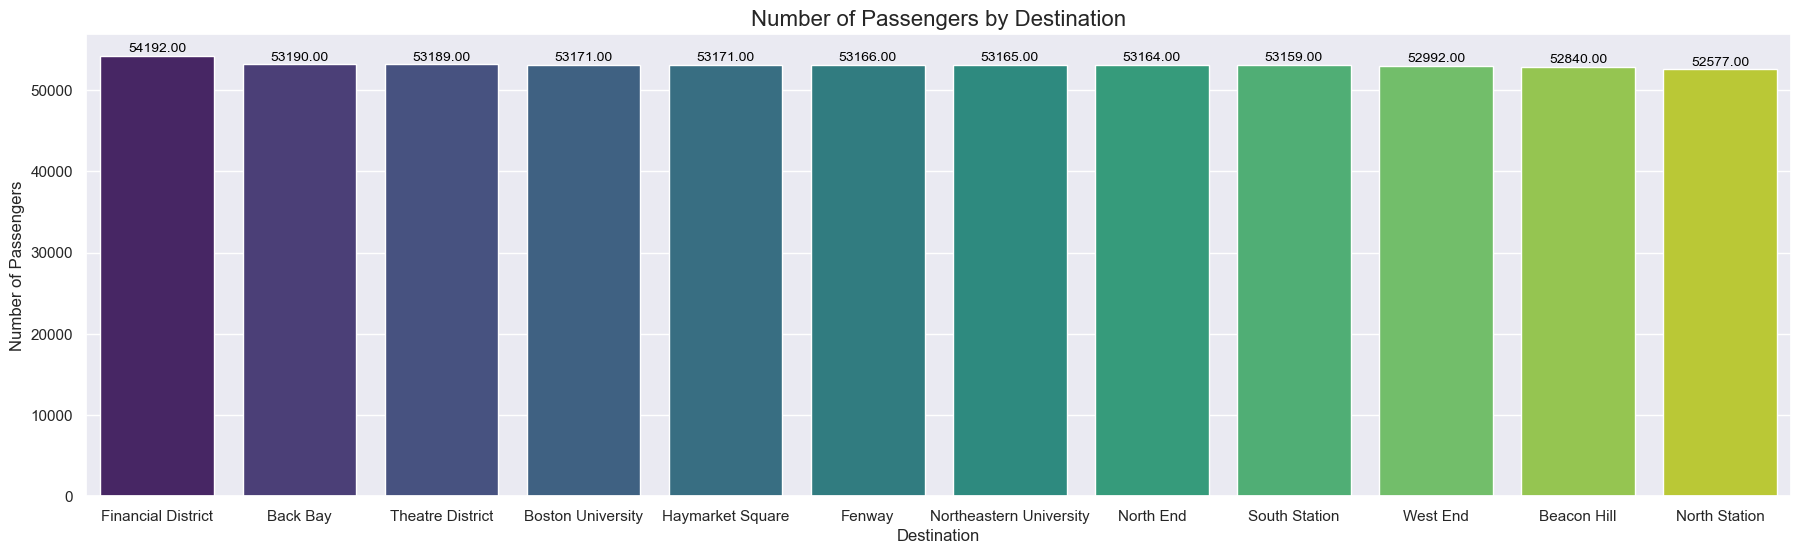

In [18]:
# Set seaborn style for a more interesting plot
sns.set_theme()

# Create a bar plot
plt.figure(figsize=(22, 6))
ax = sns.barplot(x=destination_passenger.index, y=destination_passenger.values, palette="viridis")

# Add labels to plot bars
for p in ax.patches:
     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Add axis titles and labels
plt.title('Number of Passengers by Destination', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

# Displays the plot
plt.show()

The data and visualization above provide a general overview of passenger destination preferences. From this information, we can conclude that:

- **Most Popular Destinations:** The Financial District stood out as the most popular destination, recording a total of 54,192 trips.

- **Other Popular Destinations:** Back Bay, Theater District, Boston University, and Haymarket Square are also popular destinations with passenger numbers approaching 53,000.

- **Passenger Number Variance:** Some areas, such as North Station, had lower passenger numbers compared to other main destinations, reaching a total of 52,577 trips.

- **Potential for Further Analysis:** Further analysis can be conducted to understand travel trends, changes over time, and factors influencing passenger destination preferences.

## 5. Feature Engineering

Before going any further, let's copy the data that we will use in building the model. This is done to avoid things that we don't want in the original data. The data that has been previously loaded will be entered into a new variable where the data in that variable will be processed

In [19]:
# copy the original data set
df = data.copy()

---
### 5.1 Handling Duplicate Data

In [20]:
# Check for duplicates data
df.duplicated().sum()

0

There is no duplicate data in the dataset

---
### 5.2 Analyzing correlations between data

Correlation is carried out between the 'price' column and the numeric and categorical columns

#### 5.2.1 Numerical

<Axes: title={'center': 'Correlation between other numeric column and price'}>

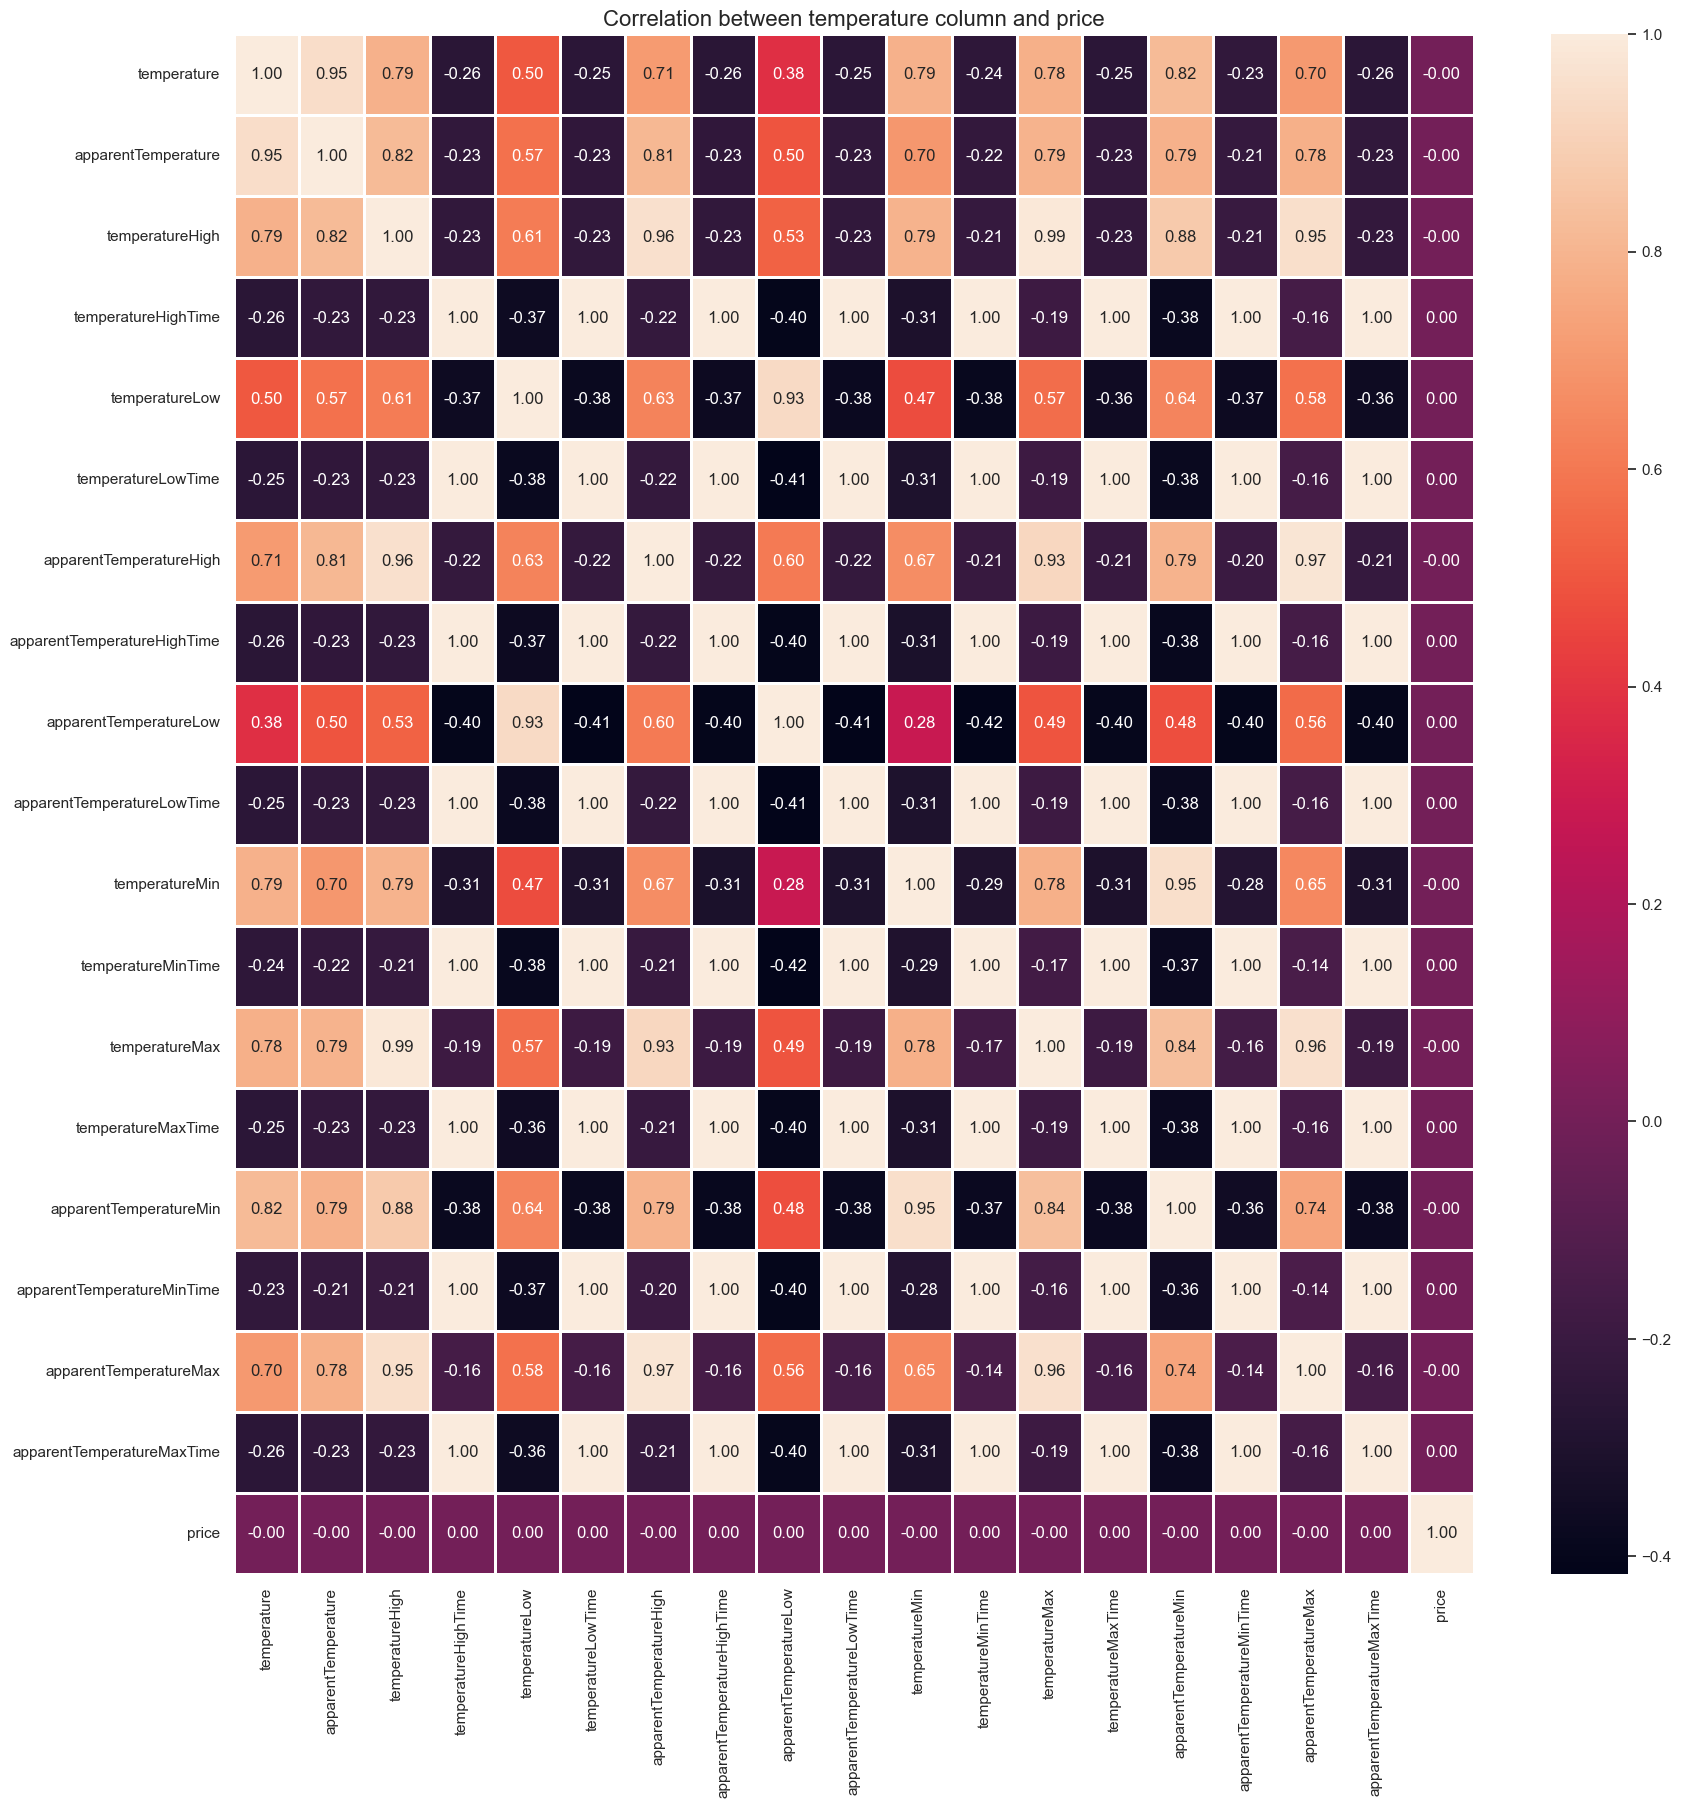

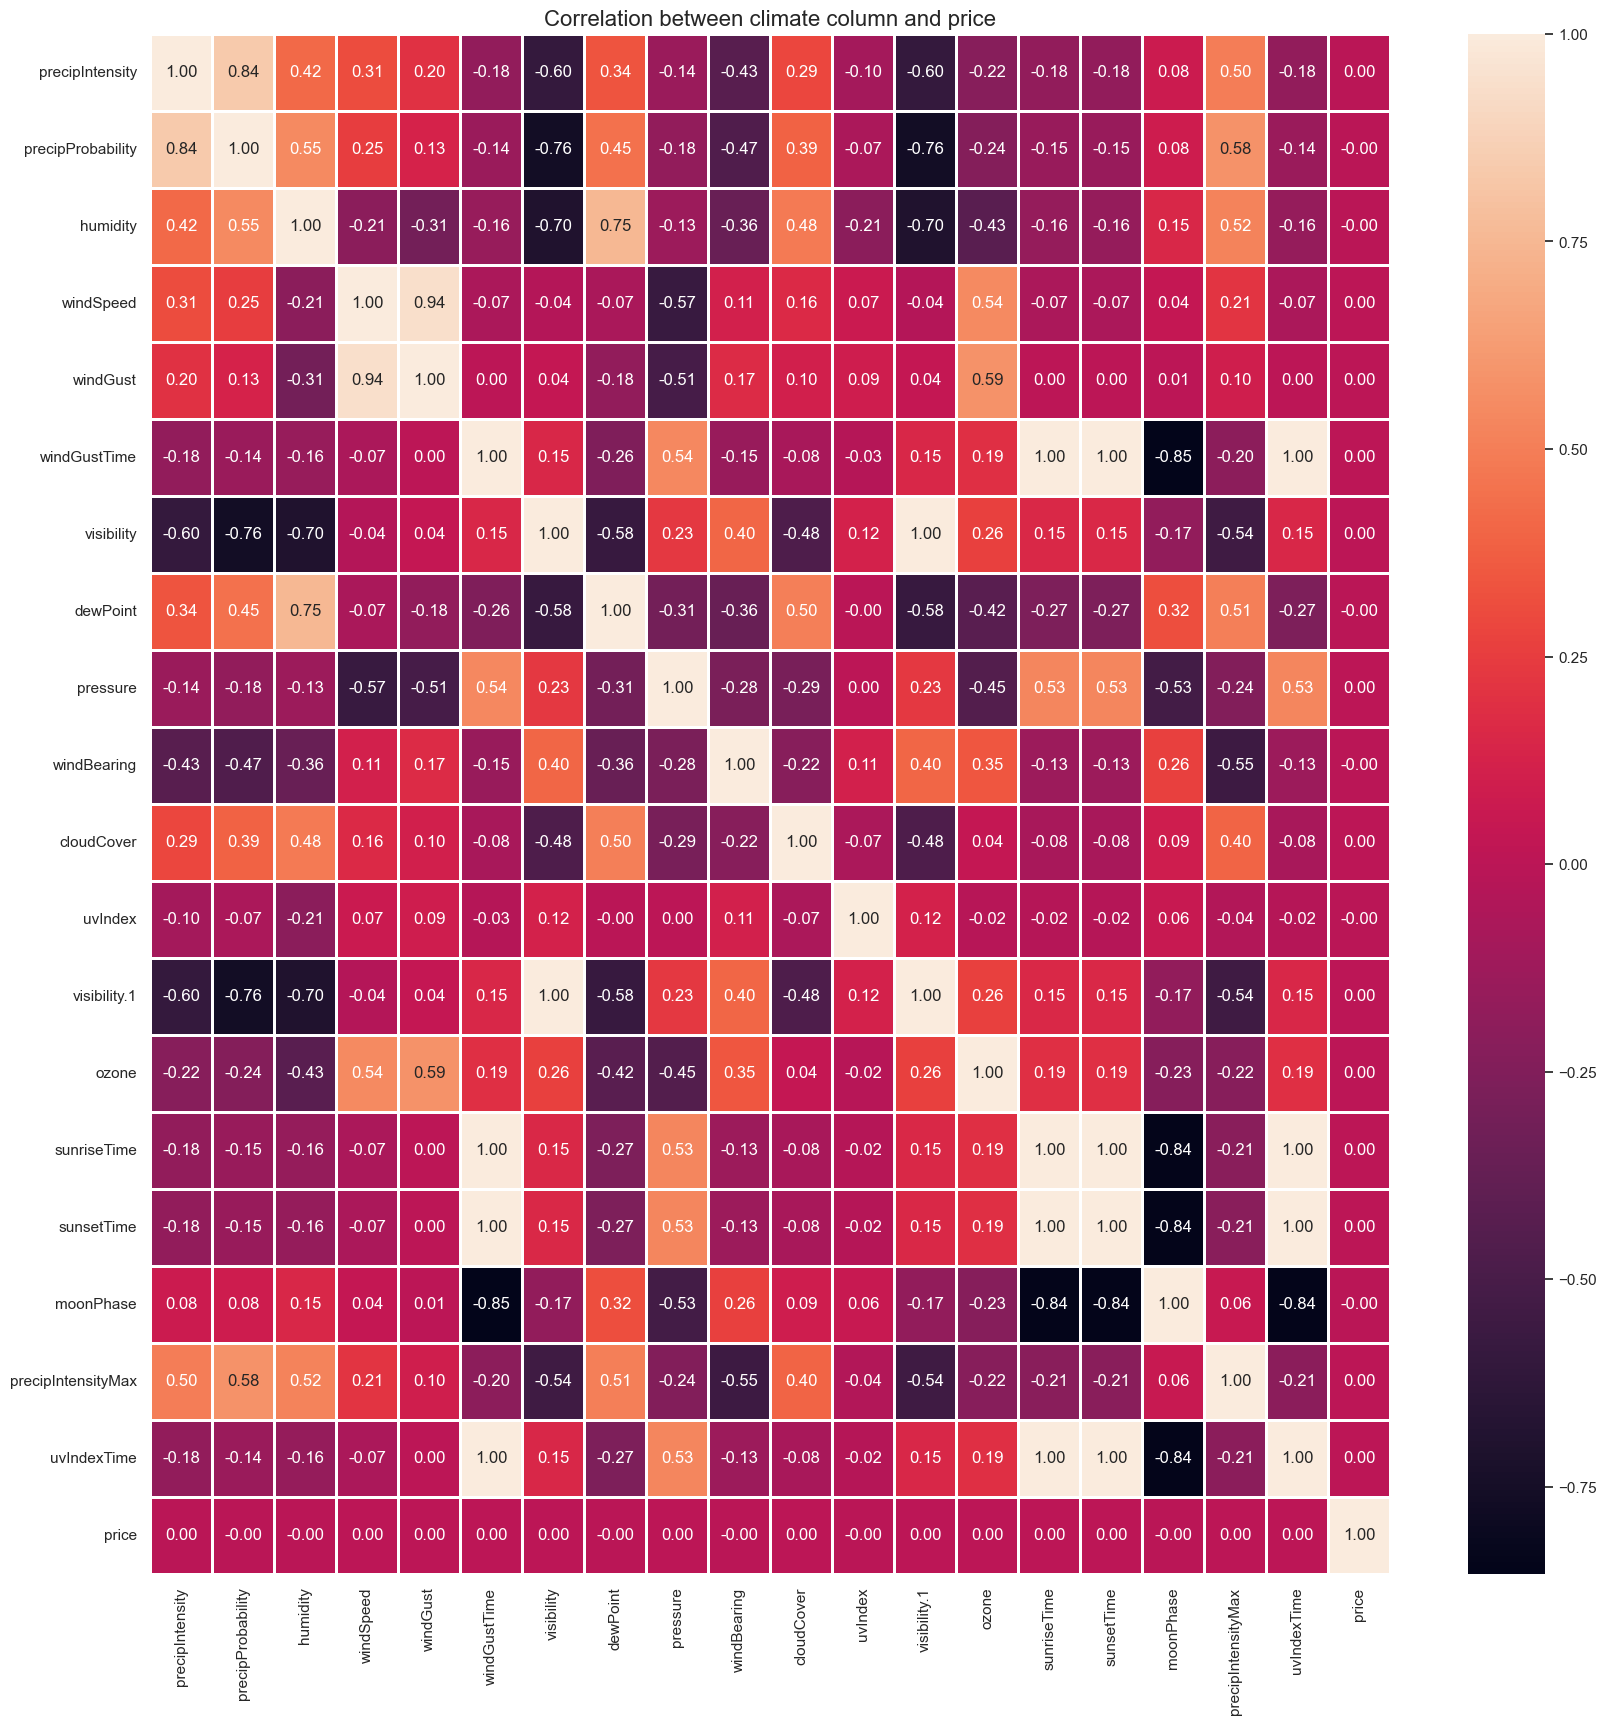

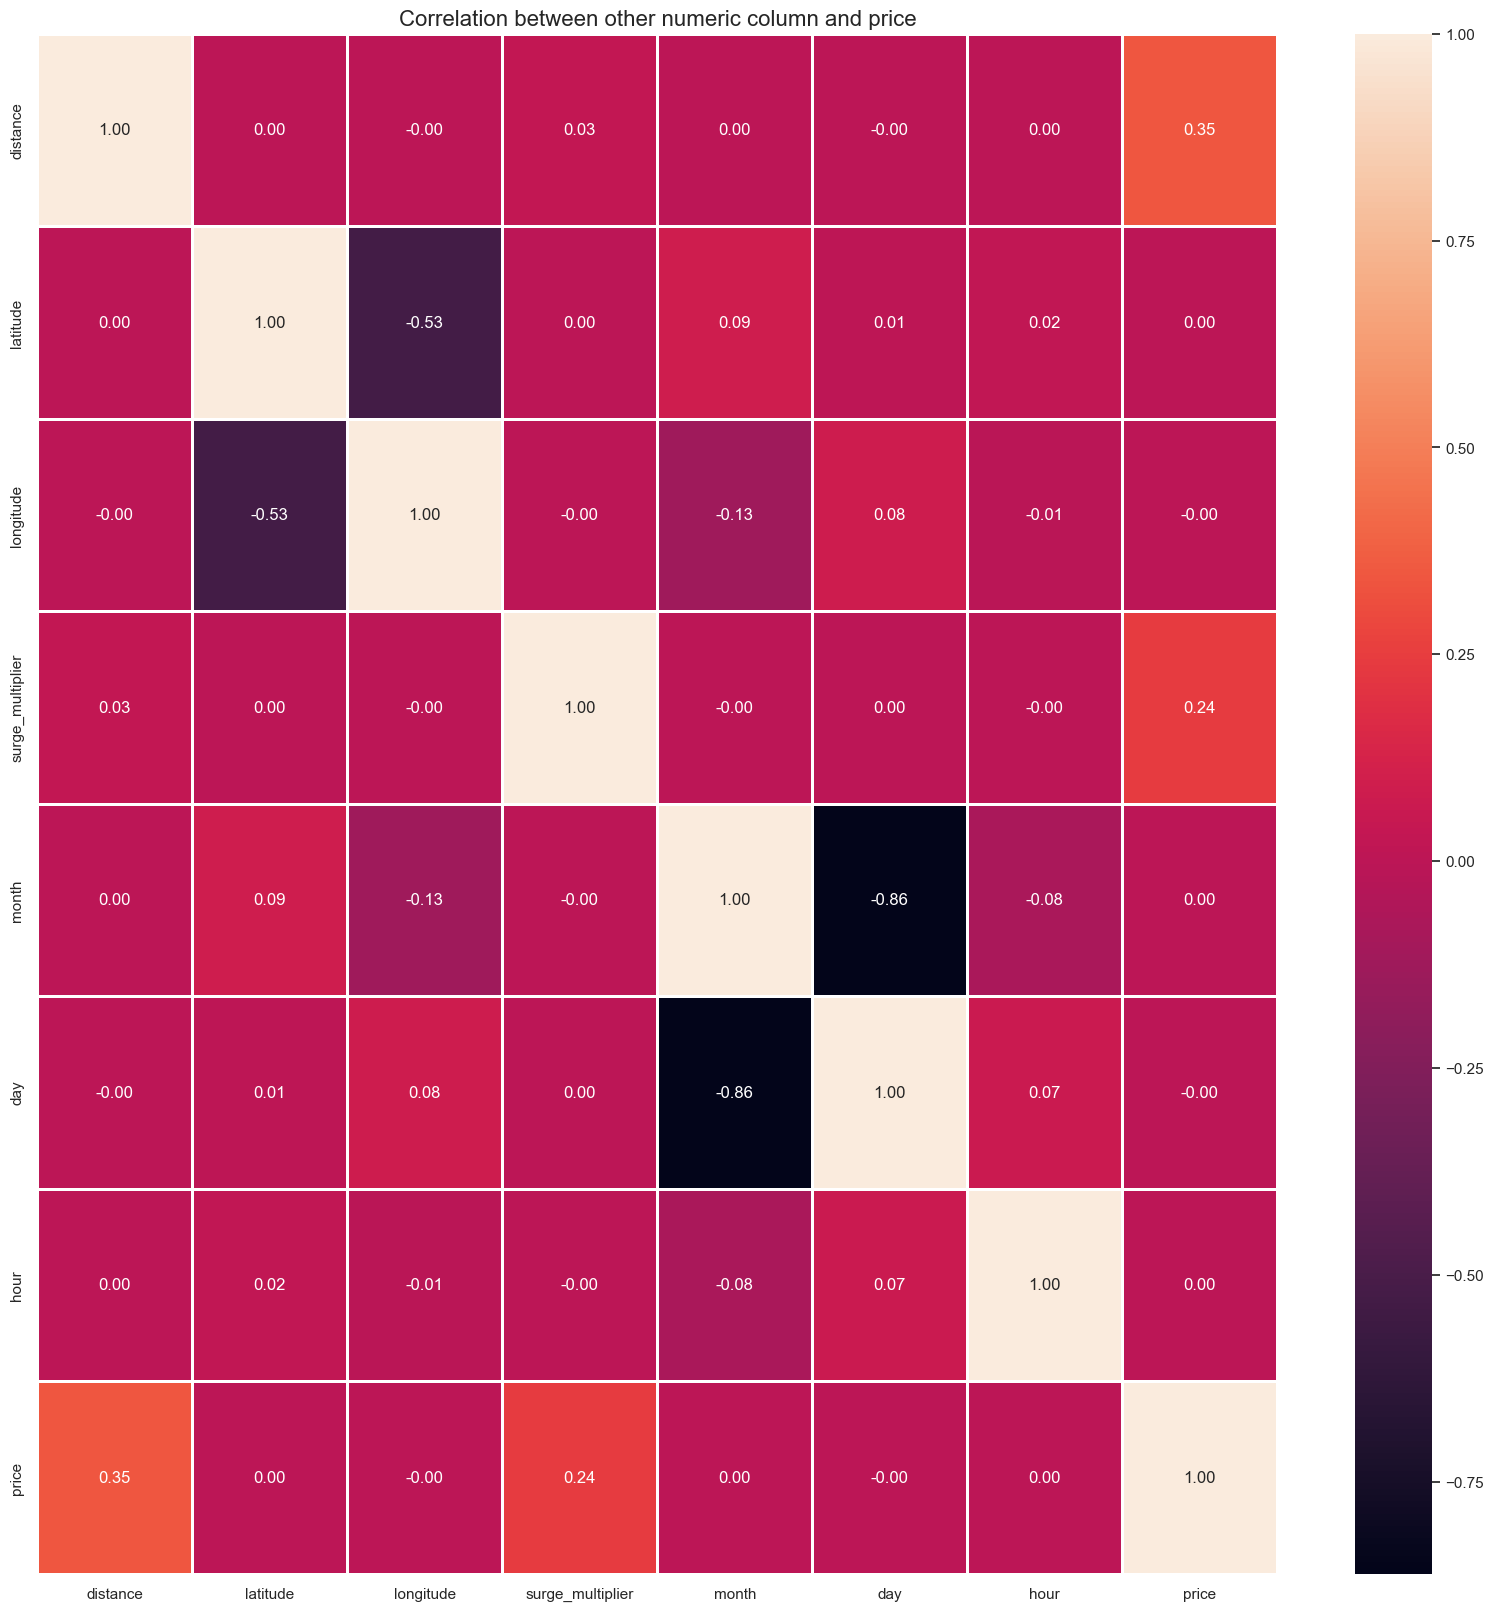

In [21]:
# Create a list containing numeric columns related to temperature
temperature_column = ['temperature','apparentTemperature','temperatureHigh','temperatureHighTime','temperatureLow',
            'temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime',
            'apparentTemperatureLow','apparentTemperatureLowTime','temperatureMin','temperatureMinTime',
            'temperatureMax','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime',
            'apparentTemperatureMax','apparentTemperatureMaxTime','price']

# Create a list containing numeric columns related to climate
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust','windGustTime', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex','visibility.1','ozone','sunriseTime','sunsetTime','moonPhase',
       'precipIntensityMax','uvIndexTime','price']

# Create a list containing other numeric columns
numeric_column = ['distance','latitude','longitude','surge_multiplier','month','day','hour','price']

# Create a new variable named df_temperature which contains a numeric column related to temperature
df_temperature = df[temperature_column]

# Create a new variable named df_climate which contains a numeric column related to climate
df_climate = df[climate_column]

# Create a new variable named df_numeric which contains other numeric column 
df_numeric = df[numeric_column]

# Pearson's test on the temperature column
plt.figure(figsize=(20,20))
plt.title('Correlation between temperature column and price', fontsize=16)
sns.heatmap(df_temperature.corr(method='pearson'),annot=True,fmt=".2f",linewidths="1")

# Pearson's test on the climate column
plt.figure(figsize=(20,20))
plt.title('Correlation between climate column and price', fontsize=16)
sns.heatmap(df_climate.corr(method='pearson'),annot=True,fmt=".2f",linewidths="1")

# Pearson's test on the other numeric column
plt.figure(figsize=(20,20))
plt.title('Correlation between other numeric column and price', fontsize=16)
sns.heatmap(df_numeric.corr(method='pearson'),annot=True,fmt=".2f",linewidths="1")

From the heatmap results of grouping climate, temperature and other numeric columns, it can be seen that the correlation value of all temperature and climate columns has no correlation with the target **price** because it is less than 0.5. so that neither group can be used as a feature. 

However, in the other numerical columns there are 2 columns that have a correlation with the target (price). The columns that have this correlation are the surge multiplier and distance columns. Therefore, these two columns will be used as features for modeling

---
#### 5.2.2 Categorical

Next, we will test the correlation between categorical columns. First of all, we will create a variable that contains columns with the categorical type

In [22]:
# Grouping categorical columns into one variable
categorical = ['source','destination','cab_type','name','short_summary','long_summary','icon']

Finished! Next, we will test the correlation between the categorical column and the target, namely the 'price' column. The correlation test will use the Kendall technique.

**Kendall:** denoted by τ (tau), also measures the strength of the monotonic relationship between variables. This correlation does not assume a specific data distribution. It is robust against outliers and can handle non-linear relationships. This is usually used when dealing with categorical or ordinal variables.

The Kendall technique is used to test the correlation between the categorical column and the price column because this technique does not require a normal distribution of data. In addition, this technique is suitable for testing the correlation between targets and categorical columns. The data we have is not normally distributed and is of the categorical type so we will use the Kendall technique to test the correlation between the columns

In [23]:
# Create a loop to test the correlation between the categorical column and 'price' using the kendalltau technique
for i in categorical:
     
    corr, pval = stats.kendalltau(df[i],df['price'])
    print(f"Correlation between {i} with Price")
    print(f"Correlation Value :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Both columns have a correlation")
    else:
        print(f"P-value :{pval}")

    print('==================================================================')

Correlation between source with Price
Correlation Value :-0.013055772826511497
P-value :2.3529257792795844e-49 -> Both columns have a correlation
Correlation between destination with Price
Correlation Value :-0.03151675812702735
P-value :2.33081827277028e-278 -> Both columns have a correlation
Correlation between cab_type with Price
Correlation Value :-0.057004480669791274
P-value :0.0 -> Both columns have a correlation
Correlation between name with Price
Correlation Value :-0.39709440059363416
P-value :0.0 -> Both columns have a correlation
Correlation between short_summary with Price
Correlation Value :0.00026118857283030585
P-value :0.7781422430770276
Correlation between long_summary with Price
Correlation Value :0.0008231820404319457
P-value :0.3689918246431466
Correlation between icon with Price
Correlation Value :0.0014072307863441582
P-value :0.13075349023039154


Based on the results of the Kendall Tau test for the categorical column group, several columns were found that had a correlation with the taget **price** when viewed from the p-value. Columns that have a p-value < 0.05 are interpreted as having a correlation between the columns. Therefore, we can conclude that there are 4 columns that have correlation with the **'price'** column, namely the **'source'**, **'destination'**, **'cab_type'**, and **'name'** columns

#### 5.2.3 Dropping columns that have no correlation

We have carried out a correlation test between each numerical and categorical column with the 'price' column. Next, we will delete the columns that have no correlation with the 'price' column and leave only the columns that have a correlation with the 'price' column.

In [24]:
# Select variables that have a correlation with the 'price' column
df_selection = df[['source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier']]
df_selection

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693065,West End,North End,Uber,WAV,9.5,1.00,1.0
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,West End,North End,Uber,UberX,9.5,1.00,1.0
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0


Done! We have deleted columns that are not needed for modeling later. Let's move on to the next stage, which is cardinality checking

---
### 5.3 Cardinality Checking

In [25]:
# set colwidth hidher
pd.set_option('display.max.colwidth', None)

cat_cols = ['source', 'destination', 'cab_type', 'name']

# Create a looping for unique values details
listItem = []
for col in cat_cols :
    listItem.append( [col, df_selection[col].nunique(), df_selection[col].unique()])

# Show the dataframe
pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'], data=listItem)

,Column Name,Number of Unique Values,Unique Values
0,source,12,"[Haymarket Square, Back Bay, North End, North Station, Beacon Hill, Boston University, Fenway, South Station, Theatre District, West End, Financial District, Northeastern University]"
1,destination,12,"[North Station, Northeastern University, West End, Haymarket Square, South Station, Fenway, Theatre District, Beacon Hill, Back Bay, North End, Financial District, Boston University]"
2,cab_type,2,"[Lyft, Uber]"
3,name,12,"[Shared, Lux, Lyft, Lux Black XL, Lyft XL, Lux Black, UberXL, Black, UberX, WAV, Black SUV, UberPool]"


We have carried out cardinality checking on each column and from the test results, it is known that:

- **source :** Have 12 Unique Values

- **destination :** Have 12 Unique Values

- **cab_type :** Have 2 Unique Values

- **name :** Have 12 Unique Values

From the cardinality checking results, each column is still included in low cardinality. Therefore, we will leave these columns for further analysis

---
### 5.4 Data Splitting

This section will separated the data into train, test and inference data.

In [26]:
# Displays data information
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   destination       637976 non-null  object 
 2   cab_type          637976 non-null  object 
 3   name              637976 non-null  object 
 4   price             637976 non-null  float64
 5   distance          637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
dtypes: float64(3), object(4)
memory usage: 38.9+ MB


In [27]:
# Define the X and y
X = df_selection.drop(['price'], axis=1)
y = df_selection['price']

# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=10)

# Check the size
print(f"Shape data train : {X_train.shape}")
print(f"Shape data test : {X_test.shape}")

Shape data train : (446583, 6)
Shape data test : (191393, 6)


The splitting process is done! After splitting the train data, it had 446.583 data and 191.393 data for the test. Let's move to the next step, which is VIF Check

---
### 5.5 VIF Check

**Variance Inflation Factor (VIF)** is a technique to check Multicollinearity. Multicollinearity is the phenomenon when a number of the independent variables are strongly correlated. The correlation between each independent variables (features) and the dependent variable (target), must be strong. But, between independent variables must have no or little correlation. A VIF of 1 is the best you can have as this indicates that there is no multicollinearity for this variable. A VIF of higher than 5 or 10 indicates that there is a multicollinearity in your model.

First, let's convert categorical variables into numerical representations using ordinal encoding, and then combine them with numerical variables to prepare training data for performing the FIV test.

#### 5.5.1 Encoding uses OrdinalEncoder to check Multicollinearity or VIF values.

In [28]:
# Define Ordinal Encoder
oe=OrdinalEncoder()

# Perform ordinal encoding on categorical variables
X_train_oe=oe.fit_transform(X_train[['source', 'destination', 'cab_type', 'name']])

# Creating a New DataFrame from Ordinal Encoding Results
X_train_column = X_train[['source', 'destination', 'cab_type', 'name']]
X_train_new = pd.DataFrame(X_train_oe, columns=oe.get_feature_names_out(X_train_column.columns))

# Combining Encoding Data with Numerical Variables
Xnum = X_train[['distance','surge_multiplier']]
combined = pd.concat([X_train_new,Xnum], axis=1, join='inner')

Finished! we have converted categorical variables into numerical representations using ordinal encoding. let's do the FIV test

#### 5.5.2 FIV test

In [29]:
# Perform the FIV test on each column
def calculation_VIF(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    return(vif)

# Calculates the VIF value for each variable in the combined DataFrame.
calculation_VIF(combined)

,variables,VIF
0,source,3.459311
1,destination,3.469355
2,cab_type,2.247851
3,name,3.773000
4,distance,4.602907
5,surge_multiplier,11.579379


The table above shows the multicollinearity value of each feature. A feature that has a VIF value greater than 10, can be concluded that the feature is dependent on other feature values, therefore it will be dropped because the assumption in Linear Regression is that existing features should not be dependent on other features. In this case it can be seen that the **surge_multiplier** column has a value greater than 10.

In [30]:
# Drop surge_multiplier column
X_train_FIV = combined.drop(['surge_multiplier'], axis=1)

# Calculates the VIF value for each variable in the X_train_FIV DataFrame.
calculation_VIF(X_train_FIV)

,variables,VIF
0,source,2.820647
1,destination,2.821735
2,cab_type,2.189915
3,name,3.285050
4,distance,3.335037


Based on the table above, it can be seen that each column has an FIV value below 10, which indicates that each feature is not dependent on each other. Therefore, we can use these columns to carry out modeling using linear regression. Next, we will remove the **surge_multiplier** column from our actual train data

In [31]:
# Drop surge_multiplier column
X_train = X_train.drop(['surge_multiplier'], axis=1)
X_test = X_test.drop(['surge_multiplier'], axis=1)

We have finished carrying out the FIV test on our features, let's move on to the next stage, namely handling outliers

---
### 5.6 Handling Outlier

For handling outliers, we will first look at the visualization of the numerical columns to see whether the numerical data has outliers. We will use a boxplot to visualize the distribution of numerical data (the 'distance' column)

<Axes: >

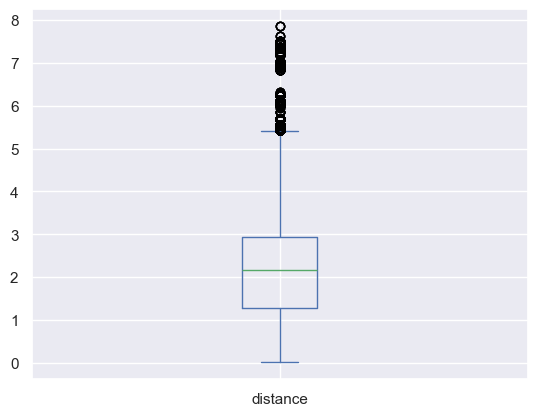

In [32]:
# Create a boxplot before handling outliers
X_train['distance'].plot(kind='box')

By looking at the image above, the scattered points show outliers in **distance**. We will also carry out statistical calculations to get the skewness of the data to ensure whether the data we have really has outliers

In [33]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the column
    for col in data.columns:
        col_name.append(col)

        # Calculate Skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly Skewed Upper and Lower Boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderatly Skewed
        elif skew_val > 0.5 or skew_val < -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normal Distribution
        else :
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))
    
    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result


In [34]:
# Select the data except categorical and target columns
outlier_check = X_train[['distance']]

# Check the data skewness and boundaries
outlier_analysis(outlier_check)

,columns,skewness,upper boundary,lower boundary,has_outliers
0,distance,0.818716,5.42,-1.22,True


By looking at the visualization image and statistical calculations, we can confirm that the 'distance' column has outliers. Because the skewness value is more than 0.5, which means the data distribution is not normal, the method used is the capping method using the Interquartile Range (IQR). By using the IQR capping method, values that are outside a certain limit range will be capped or adjusted. This can help improve data distribution and reduce the impact of outlier values on **distance**.

In [35]:
# Capping the skewed distribution
winsoriser_fare = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['distance'])

X_train = winsoriser_fare.fit_transform(X_train)

We have finished capping the 'distance' column to deal with outliers in the data. Next, we will do another visualization using a boxplot to see the distribution of the data after handling outliers.

<Axes: >

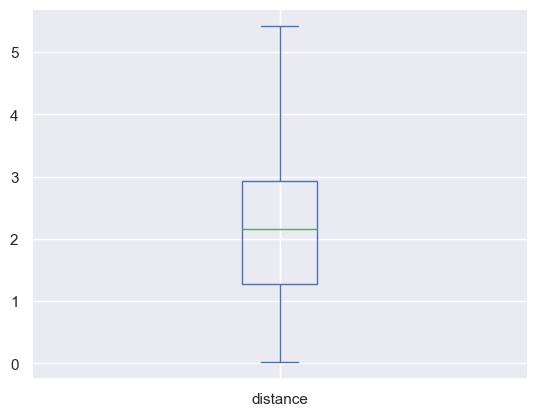

In [36]:
#membuat boxplot sebelum handling outlier
X_train['distance'].plot(kind='box')

It can be seen from the disappearance of outlier points that the outlier values have been adjusted.

---
### 5.7 Splitting Numerical and Categorical

This section will separated the numerical and categorical data in train and testing data

In [37]:
# Search for numeric and categorical columns
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['distance']
Categorical Columns:  ['source', 'destination', 'cab_type', 'name']


In [38]:
# Split numerical columns and categorical columns on train data
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

# Split numerical columns and categorical columns on test data
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

We are done separating numeric and categorical data in training and testing data. Let's move on to the next stage, namely scaling and encoding

---
### 5.8 Scalling and Encoding

Numerical data is not on the same scale, so a scaler is needed to help the model perform better. In this process, we will use **Standard Scaler** . For categorical we will try to use **One Hot Encoder** because our data has no order in relation to each other, in other words they are independent

#### 5.8.1 Scalling

In [39]:
# Define the Scaling method
scaler = StandardScaler()

In [40]:
# Scaler Initialization and Fitting
scaler.fit(X_train_num)

# Transformation of Training Data and Test Data
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Normalization Results
X_train_num_scaled

array([[-1.03275747],
       [-1.48578896],
       [ 0.14512439],
       ...,
       [ 1.02400548],
       [ 0.06357872],
       [-0.0360882 ]])

We have succeeded in scaling the numerical data, then we will encode the categorical data

#### 5.8.2 Encoding

In [41]:
# Define the Encoder
encoder = OneHotEncoder(sparse_output=False)

In [42]:
# One-Hot Encoding: 
X_train_cat_encode=encoder.fit_transform(X_train_cat[['source', 'destination', 'cab_type', 'name']])
X_test_cat_encode=encoder.transform(X_test_cat[['source', 'destination', 'cab_type', 'name']])

# Retaining Original Categorical Columns
X_train_cat=X_train_cat[['source', 'destination', 'cab_type', 'name']]
X_test_cat=X_test_cat[['source', 'destination', 'cab_type', 'name']]

# Creating DataFrames with Encoded Features
X_train_cat_encoded=pd.DataFrame(X_train_cat_encode,columns=encoder.get_feature_names_out(X_train_cat.columns))
X_test_cat_encoded=pd.DataFrame(X_test_cat_encode,columns=encoder.get_feature_names_out(X_test_cat.columns))

# Selecting Numeric Columns from Encoded DataFrame
cat_columns2=X_train_cat_encoded.select_dtypes(include = np.number).columns.tolist()

# Displaying Encoded DataFrame
X_train_cat_encoded

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446579,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
446580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
446581,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Finished!! we have finished encoding. let's combine the data we have into one dataframe

---
### 5.9 Concate Data

In this section we will combine the scaling and encoding data in the train and test data

In [43]:
# Concat X_train_final and X_test_final
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

# Save to dataframe
X_train_final = pd.DataFrame(X_train_final,columns=[num_columns+cat_columns2])
X_test_final  = pd.DataFrame(X_test_final,columns=[num_columns+cat_columns2])

In [44]:
# Displaying X_train_final DataFrame
X_train_final

,distance,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-1.032757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.485789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.145124,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.742817,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.072331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446578,2.328736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446579,2.084099,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
446580,1.024005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
446581,0.063579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Well done! we have finished doing feature engineering.

## 6. Model Definition

In the modeling that we will do, the model we will use is linear regression. The choice of linear regression for this model analysis is based on the assumption that the relationship between features and targets in this data is linear. In other words, it is assumed that changes in the feature variable will have a direct impact on the target variable. Therefore, a linear regression model was chosen. 
    
**Linier Regression :**
- Linear Regression is a method for regression problems that can explain the relationship between one dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data.


In [45]:
linreg = LinearRegression()

## 7. Model Training

We will carry out modeling using linear regression on the data we have

In [46]:
# Model Train
linreg.fit(X_train_final, y_train)

LinearRegression()

In [47]:
# Predict Train-set and Test-set
y_pred_train = linreg.predict(X_train_final)
y_pred_test = linreg.predict(X_test_final)
y_pred_train

array([19.44244385,  5.25540161,  9.18563843, ..., 12.97091675,
       14.92016602,  9.45623779])

In [48]:
y_train

330418    16.5
495647     6.0
213689    11.0
506164    14.0
380899     5.0
          ... 
579654    27.5
114679    22.0
671160    10.5
481893    13.5
375065     8.0
Name: price, Length: 446583, dtype: float64

## 8. Model Evaluation

In [50]:
# Defining datasets and predictions
datasets = {'Train Set': (y_train, y_pred_train), 'Test Set': (y_test, y_pred_test)}

# Defines the metrics to be calculated
metrics = {'MAE': mean_absolute_error, 'MSE': mean_squared_error,
            'RMSE': lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False),
            'R2 Score': r2_score,
            'MAPE': lambda y_true, y_pred: mean_absolute_percentage_error(y_true, y_pred)}

# Create a list to store metric results
results = []

# Iterates for each dataset and metric
for dataset_name, (true_values, predicted_values) in datasets.items():
     result_row = {'Dataset': dataset_name}
     for metric_name, metric_function in metrics.items():
         result = metric_function(true_values, predicted_values)
         result_row[metric_name] = result
     results.append(result_row)

# Create a DataFrame from the list of metric results
df_results = pd.DataFrame(results)

# Display DataFrame
df_results

,Dataset,MAE,MSE,RMSE,R2 Score,MAPE
0,Train Set,1.923679,9.061964,3.010310,0.895652,0.140219
1,Test Set,1.934252,9.273317,3.045212,0.893625,0.141012


From the results of the model evaluation that has been carried out, several metrics can be concluded as follows:

1. **Mean Absolute Error (MAE):**

- For both train and test data, the MAE value is relatively low (around 1.9), indicating that, on average, the model predictions deviate by around 1.92 units from the actual value. This indicates a fairly accurate prediction performance.

2. **Mean Squared Error (MSE):**

- The MSE values for both data sets are approximately 9.06 (train) and 9.27 (test), indicating the mean squared difference between predicted and actual values. Although it provides insight into prediction errors, MSE is more sensitive to outliers due to the powering operation.

3. **Root Mean Squared Error (RMSE):**

- The RMSE value (approximately 3.01 for train and 3.04 for test) provides an interpretable measure of the average magnitude of prediction error. The similarity of the RMSE values between train and test shows consistent performance on both datasets.

4. **R2 Score:**

- The R2 score can be said to be quite high, with a value of around 0.89 for both train and test data. This indicated that the model explained approximately 89% of the variance in the target variables, demonstrating a good level of accuracy and a strong ability to capture patterns and relationships in the data. and the level of difference in percentage accuracy between the train and test sets has a very small difference, namely 0.0011, which means the model has entered Bestfit/Goodfit.

5. **Mean Absolute Percentage Error (MAPE):**

- MAPE values are relatively low (around 0.14), indicating that, on average, model predictions deviate by around 14% from actual values. Lower MAPE values indicate a better fit of the model to the data.

## 9. Model Saving

In [51]:
# Save Numerical and Categorical Column Names into JSON Files
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

# Saving the Scaler into a Pickle File
with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

# Saving the Encoder into a Pickle File
with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

# Saving a Linear Regression Model into a Pickle File
with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(linreg, file_5)

In [52]:
X_train_final

,distance,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-1.032757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.485789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.145124,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.742817,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.072331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446578,2.328736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446579,2.084099,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
446580,1.024005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
446581,0.063579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 10. Model Inference

The Inference Model is at Ogi_Hadicahyo_Inference.ipynb

## 11. Conclusion

From the entire modeling process several conclusions were obtained, namely:

- After analyzing this data set. It is known that the taxi **price** can be influenced by the values in the source, destination, cab_type, name, and distance columns. so that the price can be predicted based on these columns.

- The model created here can accurately predict taxi travel fares based on the factors mentioned above. It can be said to be accurate because the R2 Score value is 0.89, in other words the accuracy level reaches 89%.

- The modeling results can be said to be very good, because the difference in the R2 Score values of the train and test sets is very small, this model does not experience overfit or underfit, and the model falls into the bestfit/goodfit category.

- Even though the model that has been created is considered good, the model performance can still be improved, hyperparameter adjustments can be made, and more detailed/better feature selection.

## Conceptial Problems

### 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! *(Gunakan bahasa anda sendiri)*

***1. Linear Relationship:***

- The first assumption in linear regression is that the relationship between the independent variable and the dependent variable has a linear form. In this context, Spearman's test is used to evaluate the existence of a linear relationship between these variables.

***2. Multicollinearity:***

- Multicollinearity is observed to ensure that each independent variable makes an independent contribution to the model. This means that there is no significant dependency between the independent variables. In this context, it is important to avoid multicollinearity problems that can cloud the interpretation of the coefficients and the accuracy of the model.

***3. Residual Normality:***

- The assumption about residual normality states that the difference between the actual observed value and the value predicted by the model must have a normal distribution. This can be evaluated using visual methods such as Quantile-Quantile (QQ) plots or histograms to ensure that the residuals follow a normal distribution pattern.

***4. No Auto Multicollinearity:***

- An important aspect of linear regression analysis is ensuring that there is no perfect linear relationship between two or more independent variables. Auto multicollinearity, or a high degree of dependence between independent variables, can result in difficulties in estimating coefficients with accuracy. Therefore, special attention is paid to avoid the impact of this problem.

**5. Homoscedasticity:**

- The homoscedasticity assumption indicates that the model error variance should be constant along all levels of the independent variable. That is, the error distribution should not vary systematically with the predicted value. Ensuring homoscedasticity helps ensure that the model can provide consistent and reliable predictions across the entire range of values of the independent variables.

### 2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

In [53]:
coefficients = linreg.coef_
intercept = linreg.intercept_

params = {
    'feature': X_train_final.columns.tolist(),
    'coefficient': linreg.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  -186209299467.80936


,feature,coefficient
0,"(distance,)",3.344832e+00
1,"(source_Back Bay,)",-5.689727e+10
2,"(source_Beacon Hill,)",-5.689727e+10
3,"(source_Boston University,)",1.544299e+11
4,"(source_Fenway,)",1.544299e+11
5,"(source_Financial District,)",-5.689727e+10
6,"(source_Haymarket Square,)",1.544299e+11
7,"(source_North End,)",1.544299e+11
8,"(source_North Station,)",-5.689727e+10
9,"(source_Northeastern University,)",1.544299e+11


In the context of regression analysis, the intercept value is a constant or predicted value when all independent variables (slopes) are at zero. Slope is a coefficient that describes the linear relationship between each independent variable and the dependent variable.